## Important Libraries 

In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
import sys 
print(sys.version)

3.12.7 | packaged by Anaconda, Inc. | (main, Oct  4 2024, 13:17:27) [MSC v.1929 64 bit (AMD64)]


In [3]:
# Loading the image
img= cv2.imread(r"C:\Users\keshav\OneDrive\Desktop\people.webp")

In [4]:
# cheching the dimension
img.shape

(564, 800, 3)

In [5]:
# Now showing the image
cv2.imshow("People on Beach", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [6]:
# Resize the img 
w= 1400
h= 800
up= (w,h)
img= cv2.resize(img, up)

In [6]:
# Now showing the image after resize
cv2.imshow("Image after resize", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

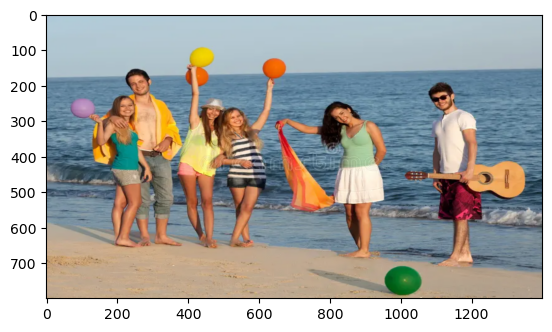

In [7]:
# Converting from BGR to RGB
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
img.shape

(800, 1400, 3)

In [9]:
file_path="C:\\Users\\keshav\\OneDrive\\Desktop\\Recorded Lectures Video\\AI Files & REcordings\\coco.names"

In [10]:
ClassName=[]
classfile= file_path
with open(classfile,'r') as f:
    ClassNames= f.read().rstrip('\n').split('\n')

In [11]:
ClassNames

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [12]:
# Checking ClassNames Length
len(ClassNames)

80

In [13]:
ClassNames[10]

'fire hydrant'

In [14]:
model = "C:\\Users\\keshav\\OneDrive\\Desktop\\Recorded Lectures Video\\AI Files & REcordings\\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt"
weights= "C:\\Users\\keshav\\OneDrive\\Desktop\\Recorded Lectures Video\\AI Files & REcordings\\frozen_inference_graph.pb"

In [15]:
net = cv2.dnn_DetectionModel(weights, model)

In [16]:
img= cv2.imread(r"C:\Users\keshav\OneDrive\Desktop\people.webp")

In [17]:
img.shape

(564, 800, 3)

In [18]:
# Setting up the model
net.setInputSize(224,224)
net.setInputScale(1.0/127.5)
net.setInputMean((127.5,127.5,127.5))
net.setInputSwapRB(True)

< cv2.dnn.Model 000001736F16BF70>

In [19]:
# Image Detection
class_,conf,bbox= net.detect(img,confThreshold=0.5)

In [20]:
print("Class:", class_)
print("bbox:", bbox)
print("confidence Level:",conf)

Class: [ 1  1  1  1 42  1 37  1]
bbox: [[442 159 112 355]
 [ 80 119 128 349]
 [219 158  82 303]
 [266 173  93 289]
 [678 288 100  85]
 [602 140 109 337]
 [539 491  70  73]
 [368 189 116 229]]
confidence Level: [0.7426248  0.711201   0.6622439  0.6538275  0.6318983  0.57428443
 0.55853933 0.55615735]


In [21]:
print(ClassNames[79])
print(ClassNames[0])
print(ClassNames[7])

toothbrush
person
truck


In [28]:
# Object Detection
for cl,conf,bb in zip(class_.flatten(),conf.flatten(),bbox):
    cv2.rectangle(img, bb, color=(0,225,0), thickness=3)
    cv2.putText(img, ClassNames[cl-1],(bb[0]+10,bb[1]+25),cv2.FONT_HERSHEY_COMPLEX,1.0,(0,255,255),1)
    cv2.putText(img, ClassNames[cl-1],(bb[0]+10,bb[1]+25),cv2.FONT_HERSHEY_COMPLEX,0.8,(0,255,255),1)
    cv2.putText(img, str((conf*100)//1)+'%',(bb[0]+10,bb[1]+50),cv2.FONT_HERSHEY_COMPLEX,0.5,(0,255,255),1)

In [29]:
cv2.imshow("Detected Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

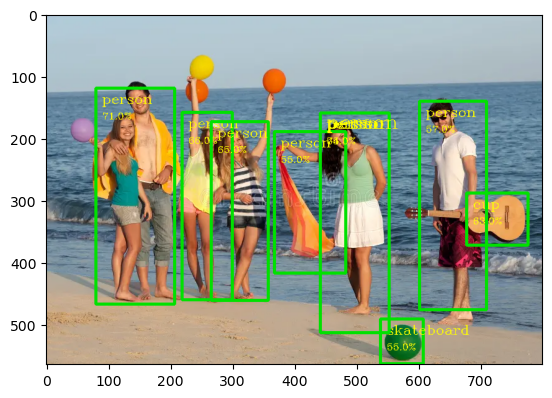

In [30]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()